### Logistic regression

###### 6/29/2021 John Park 
Logistic regression is a fantastic place to start for classification problems. It is also great to build up on our discussion about ordinary least square regression method. More importantly, it has shockingly close connection with deep neural networks (sigmoid function, recursive generalized linear model, backward propagation, updating weights). It is essential to understand logistic regression to further advance in machine learning. 

Logistic regression is one of the simpliest probablistic classifiers. It has bunch of advantages, and most important one is that the outcome does not get affected by collinearity of the indepdent variables, thus robust to correlated features, and therefore is suitable for large scale data analysis (Jurafsky, 2020). Whereas naive bayes is more suitable for smaller data set and is sensitive to collinearity of the features. However it is easy to implement and train the data. 

In this notebook, we will cover various topics arising from derivation and implementation of logistic regression. The topics include weighted linear regression, probability distribution, conditional probability, cross entropy loss, gradient decsent, probablistic classifier.   

I adapted codes from https://beckernick.github.io/logistic-regression-from-scratch/

References: 

Elements of statistical learning 

Speech and language Processing, Daniel Jurafsky, James W. Martin. 2020.

##### Conditional probability 

$$\hat y $$

$$ P(y=1 | X)=  $$

$$ P(y=0 | X)= $$

##### Maximum likelihood estimation of bernoulli distribution 
$$ L (\hat y,y) = y log\hat y +(1-y) log(1-\hat y) $$
###### Cross entropy Loss LCE derivation
$$-log(p(y| x)= -[ylong \hat y +(1-y)log(1-\hat y)]$$

###### Partial derivative of LCE $$ \frac{\partial L_{CE}}{\partial w_{j}}= [\sigma (w\dot x +b)-y]x_{j} $$

###### Equation for updating weight 

$$ W(n+1) = W(n) - \eta [ \sigma(W(n)^Tx+b-y)]X $$

###### How is gradient calculated? chain rule

In [1]:
import numpy as np
import pandas as pd
import math
import os
import sys
os.getcwd()

'C:\\Users\\vmlea\\Documents\\Work\\Essential-Math-for-ML\\Chap1-Linear-Regression'

In [361]:
def sigm(x):
    return 1 / (1 + np.exp(-x))
#assert sigm(0) == 0.5 #what is assert?

def update_weight(x,w){
    
}

SyntaxError: invalid syntax (<ipython-input-361-cff416ec460b>, line 5)

In [362]:
def log_likelihood(features, target, weights):
    scores = features.T@weights.T
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0]))
        features = np.vstack((intercept, features))
    #print(features.T)
    weights=[np.zeros(features.T.shape[1])]
    #print(weights.T)
    loglike=[]
    for step in range(num_steps):
        scores = features.T@weights[step].T
        #print(scores)
        predictions = sigm(scores)
        #print(predictions)
        #print(target)
        output_error_signal = target - predictions
        #print(output_error_signal)
        gradient = features@output_error_signal.T
        #print(gradient.T)
        #print(weights)
        weights.append(weights[step]+learning_rate * gradient.T)
        loglike.append(log_likelihood(features, target, weights[step]))
        # Print log-likelihood every so often
    
    return [weights,loglike]


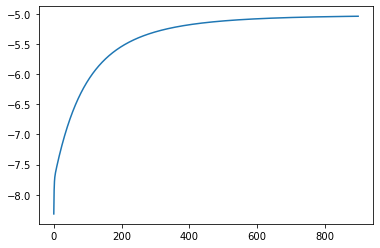

In [363]:
df=pd.read_csv('../data/examPF.csv')
x=np.array(df[df.columns[0]])
y=np.array(df[df.columns[1]])
weights,loglike = logistic_regression(features=x, target=y,
                     num_steps = 900, learning_rate = 0.01, add_intercept=True)
import matplotlib.pyplot as plt
plt.plot(loglike)

In [364]:
weights[900]

array([-3.48071834,  1.08489784])

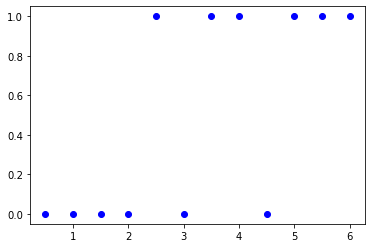

In [365]:
plt.plot(x,y,'bo')

In [366]:
t=np.linspace(0, 6, 100)
wt=sigm(weights[900][0]+weights[900][1]*t)

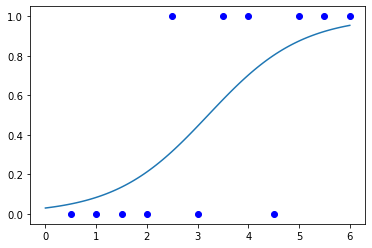

In [367]:
plt.plot(x,y,'bo')
plt.plot(t,wt)

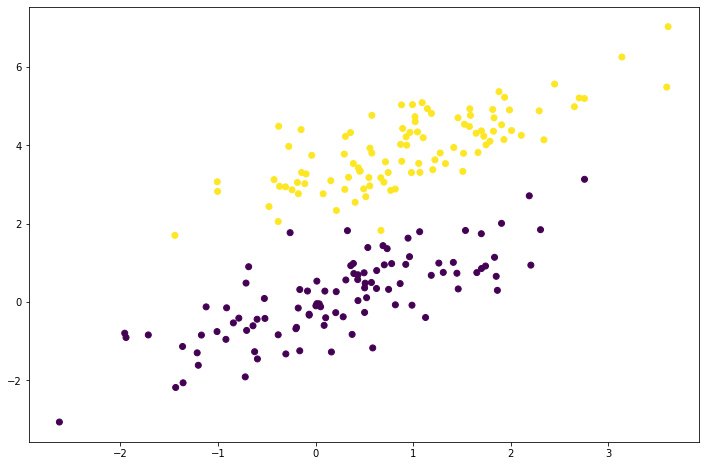

In [368]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 100

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels)



In [369]:
def log_likelihood_mul(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression_mul(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood_mul(features, target, weights))
        
    return weights

weights= logistic_regression_mul(simulated_separableish_features, simulated_labels,
                     num_steps = 30000, learning_rate = 5e-5, add_intercept=True)


-136.8177441164513
-10.953955390868586
-8.033400789389093


In [370]:
weights

array([-5.55717412, -2.14892099,  3.36519305])

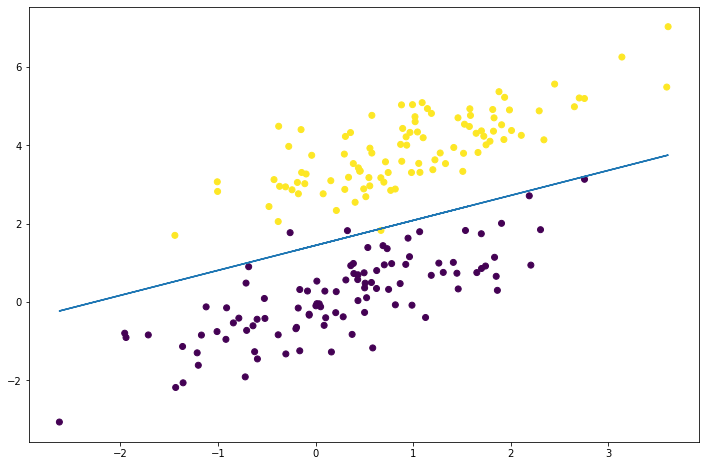

In [371]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels)
line=(np.log(0.5)-weights[0]-weights[1]*simulated_separableish_features[:, 0])/weights[2]
plt.plot(simulated_separableish_features[:, 0],line)

#### Questions and follow ups.

###### Maxent is logistic regression. Ecological niche modeling, species distribution modeling
###### How do you plot decision boundary to show the convergence of the loss - continuous fitting? Movie? or spectrum of lines?
###### Why vector and matrix are different to implement in funtion? I want to make the functions more simple. 
###### from 4.4.1. pp 120 in Elements of statistical learning, why is log likelihood np.sum( target*scores - np.log(1 + np.exp(scores)) )?
###### What is the difference using gradient descent (features*output_error_signal) vs newton's method?